In [3]:
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('--data',  dest='data', type=str, required=False, help='Path to input data')
args = parser.parse_args("")

## import data
if args.data is None:
    print("Using default path: /home/aglover/HPE/data/fault_button/s1_v1")
    args.data = "/home/aglover/HPE/data/fault_button/s1_v1"

from bimvee.importIitYarp import importIitYarp

try:
    events = importIitYarp(filePathOrName=args.data)
except:
    print("could not import data")
    exit

Using default path: /home/aglover/HPE/data/fault_button/s1_v1
importIitYarp trying path: /home/aglover/HPE/data/fault_button/s1_v1
importIitYarp trying path: /home/aglover/HPE/data/fault_button/s1_v1/ATIS
could not import data


In [9]:
import csv

with open(args.data + "/ground_truth.csv", newline='') as csvfile:
    #spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    gt = [float(row.split()[0]) for row in csvfile]



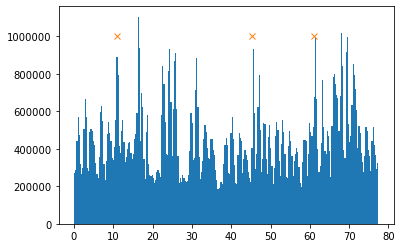

In [11]:
import matplotlib.pyplot as plt
import math

ts = events['data']['left']['dvs']['ts']

dataset_tlen = ts[-1] - ts[0]
dataset_tres = 0.3
hist_bins = math.ceil(dataset_tlen / dataset_tres)

#plt.plot(ts, bins=10)

plt.hist(ts, bins=hist_bins)
plt.plot(gt, [1e6 for x in gt], 'x')



